### 1. Body Fat estimation 

We will use the Body fat dataset (252 observation) to estimates of the percentage of body fat using various body circumference measurements for 252 men.

In [9]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
#Reading the dataset into a dataframe

df_body_fat = pd.read_csv('04_Bodyfat.csv')
df_body_fat.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
#Dropping the density column

df_body_fat = df_body_fat.drop(columns = 'Density')
df_body_fat

,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [5]:
#Checking for data quality
df_body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bodyfat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [7]:
#Checking for the correlations of different factors with bodyfat
df_body_fat.corr()['bodyfat']

bodyfat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: bodyfat, dtype: float64

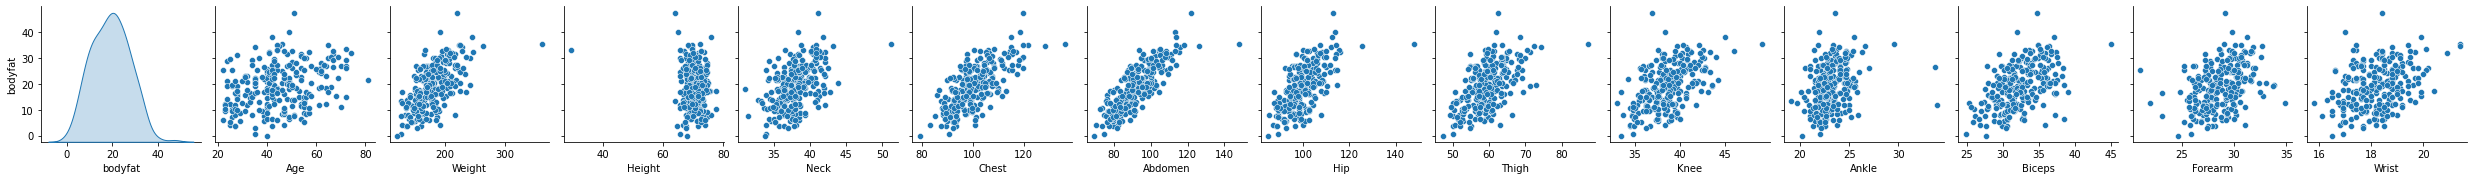

In [14]:
#Plotting the different features w.r.t. bodyfat

sns.pairplot(data = df_body_fat, 
            y_vars = 'bodyfat', 
            diag_kind ='kde')

- Visualization suggests correlation with weight, chest, abodomen, hip and thigh
- Direct correlation also suggests the same features

In [17]:
#Training the model 

Y = df_body_fat.bodyfat
X = df_body_fat.drop(columns = 'bodyfat')

X = sm.add_constant(X)

reg_m_bodyfat_1 = sm.OLS(Y,X).fit()

print(reg_m_bodyfat_1.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           7.72e-64
Time:                        12:02:54   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

In [22]:
reg_m_bodyfat_1.pvalues[reg_m_bodyfat_1.pvalues < 0.05]

Neck       4.404908e-02
Abdomen    3.633464e-23
Forearm    2.410195e-02
Wrist      2.719505e-03
dtype: float64

In [49]:
#Checking for multicollinearity
#Creating an VIF series using List Comprehension

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X.values,i)
             for i in range(X.shape[1])],
             index=X.columns)

print(vif_series)

const      4091.885819
Age           2.250450
Weight       33.509320
Height        1.674591
Neck          4.324463
Chest         9.460877
Abdomen      11.767073
Hip          14.796520
Thigh         7.777865
Knee          4.612147
Ankle         1.907961
Biceps        3.619744
Forearm       2.192492
Wrist         3.377515
dtype: float64


-----------------------------------------------------------------------------------------------------------------
- Visualization and correlation analysis had suggested correlation with weight, chest, abodomen, hip and thigh
- Significance testing also suggests Neck, Abdomen, Forearm and Wrist
- The vif test for multicollinearity suggests moderate collinearity for the above features, except Abdomen
- We proceed with the variables that pass the significance and collienarity tests (Neck,Forearm, Wrist)
- And we retrain the model

In [60]:
#Re-raining the model 

shortlisted_features = ['Neck', 'Forearm', 'Wrist'] #Abdomen dropped due to high VIF

Y2 = df_body_fat.bodyfat
X2 = df_body_fat[shortlisted_features]

X2 = sm.add_constant(X2)

reg_m_bodyfat_2 = sm.OLS(Y2,X2).fit()

print(reg_m_bodyfat_2.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     27.24
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           2.93e-15
Time:                        13:27:27   Log-Likelihood:                -856.56
No. Observations:                 252   AIC:                             1721.
Df Residuals:                     248   BIC:                             1735.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.2342      9.149     -4.835      0.0

- The Forearm and Wrist features have high p values, hence they don't pass the significance test.
- Also, the coefficient for 'Wrist' is negative. It cannot be possible as the wrist size increases as per weight in general

In [57]:
#Checking Variance Inflation Factor in the new model as well

vif_series_2 = pd.Series([variance_inflation_factor(X2.values,i)
             for i in range(X2.shape[1])],
             index=X2.columns)

print(vif_series_2)

const      395.598896
Neck         2.552771
Forearm      1.729726
Wrist        2.373912
dtype: float64


- Forearam and Wrist have high p values, hence we proceed only with the feature 'Neck'
- We attempt two OLS estimations, one with intercept and another without intercept

In [61]:
#Regression with Intercept

Y3 = df_body_fat.bodyfat
X3 = df_body_fat['Neck']

X3 = sm.add_constant(X3)

reg_m_bodyfat_3 = sm.OLS(Y3,X3).fit()

print(reg_m_bodyfat_3.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     79.24
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.15e-16
Time:                        13:39:13   Log-Likelihood:                -857.75
No. Observations:                 252   AIC:                             1720.
Df Residuals:                     250   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.0150      7.223     -6.232      0.0

In [63]:
#Regression without Intercept

Y4 = df_body_fat.bodyfat
X4 = df_body_fat['Neck']

#X4 = sm.add_constant(X4)

reg_m_bodyfat_4 = sm.OLS(Y4,X4).fit()

print(reg_m_bodyfat_4.summary())


                                 OLS Regression Results                                
Dep. Variable:                bodyfat   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              1539.
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                   4.47e-109
Time:                        13:48:42   Log-Likelihood:                         -875.95
No. Observations:                 252   AIC:                                      1754.
Df Residuals:                     251   BIC:                                      1757.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

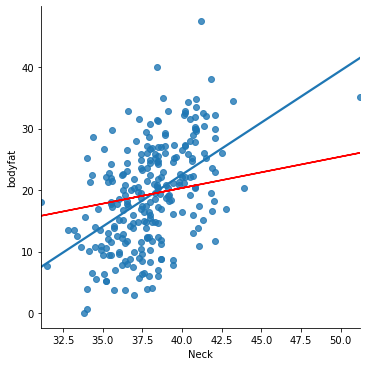

In [70]:
#Superimposing the two regression plots on one another
sns.lmplot(data = df_body_fat, x = 'Neck', y = 'bodyfat', ci = None)
plt.plot(df_body_fat.Neck, df_body_fat.Neck*0.5089, color = 'r' )
plt.show()

#### We can leave out the intercept when we know for sure that it is zero, else the intercept should remain. 
- The regression model is y=  - 45.0150 + 1.6889x 
- where x is neck and y is the bodyfat

### 2. Predicting Sales with Ad Spend

In [71]:
#Reading the Ad Spend data file into a data frame
df_sales = pd.read_csv('05_Sales_AdSpend.csv')

df_sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [73]:
#Checking for correlation via the .corr metho

df_sales.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

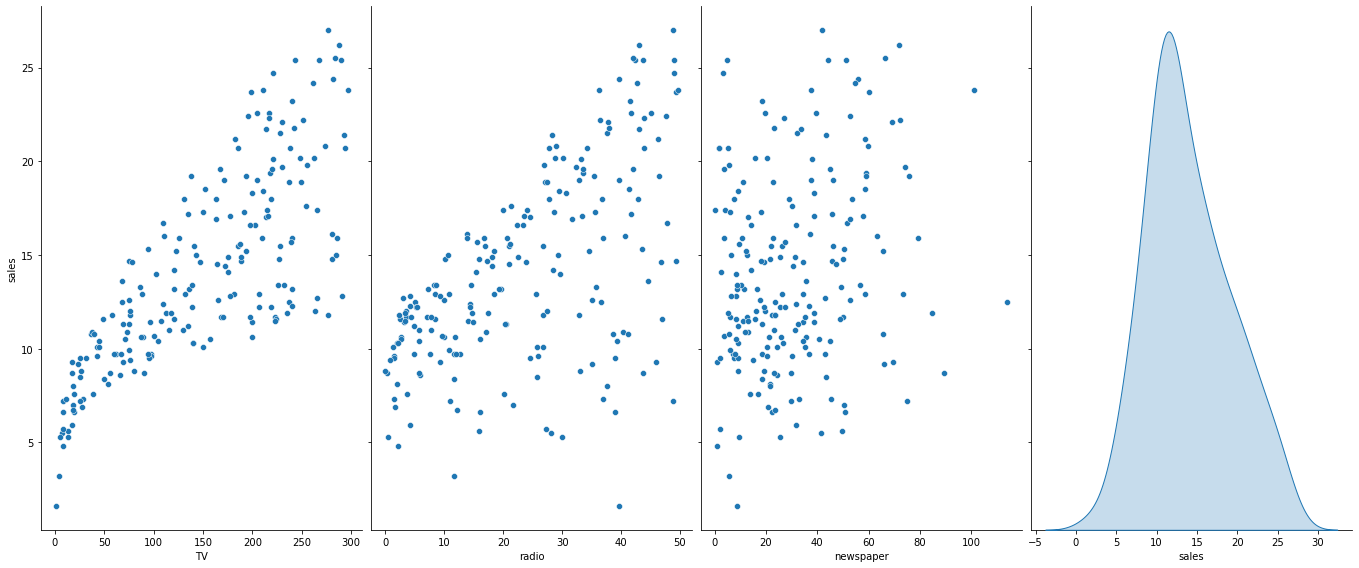

In [78]:
#Checking for correlation via the pairplot (for all predictor variables vs sales)
sns.pairplot(data = df_sales, 
             y_vars= 'sales',
             diag_kind = 'kde' , 
             height=8, aspect=0.6)

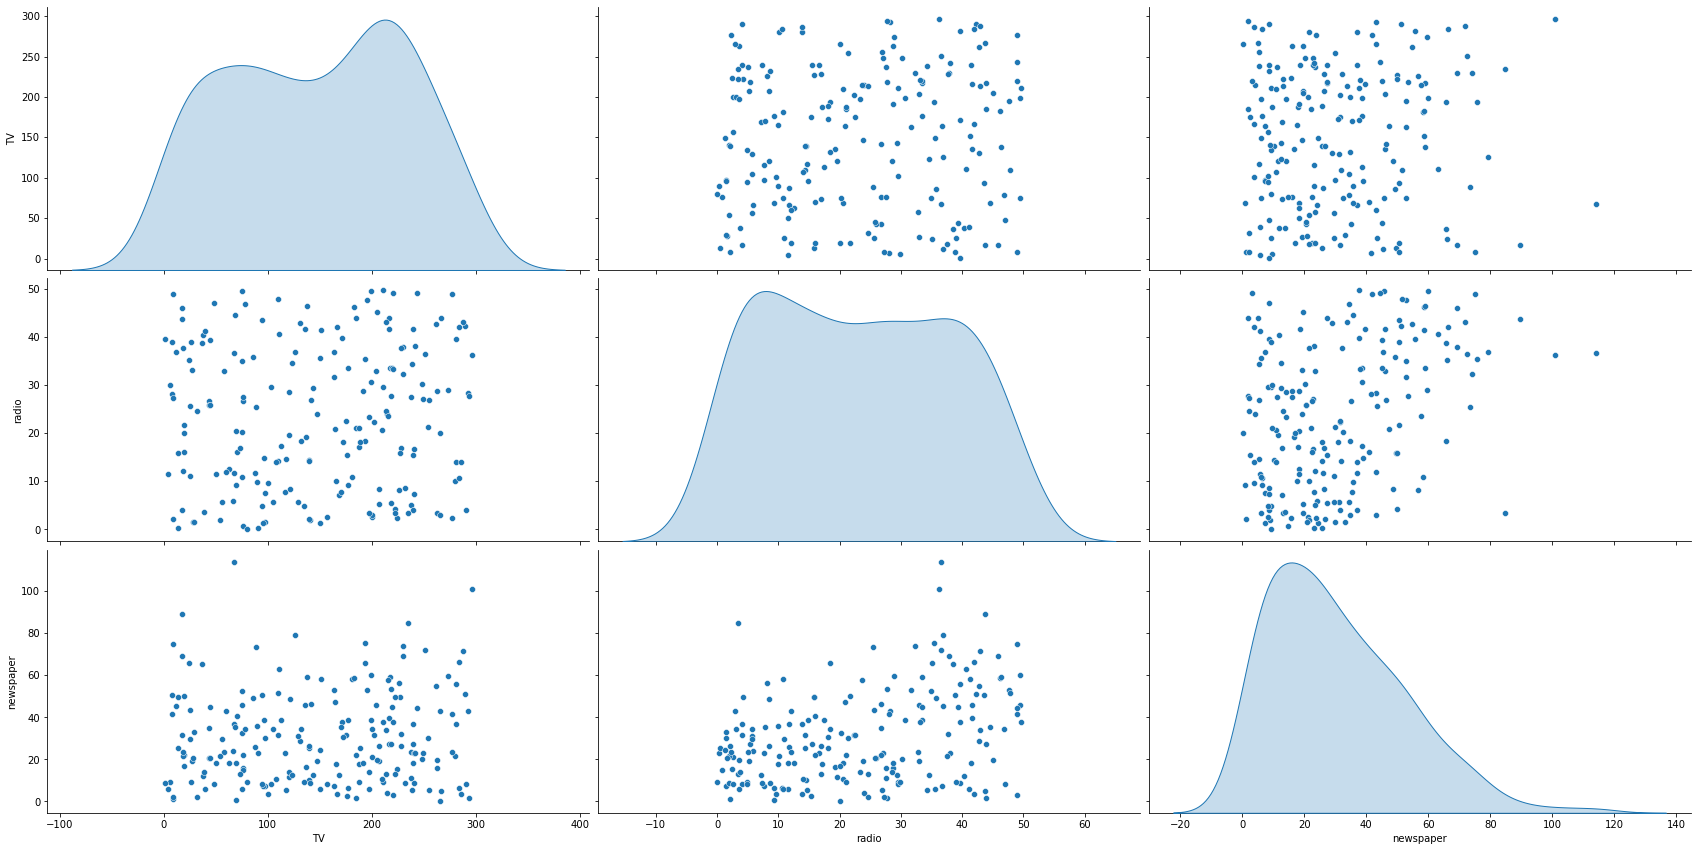

In [82]:
#Checking for correlation via the pairplot (for predictor variables among each other)
sns.pairplot(data = df_sales.drop(columns = 'sales'), 
             diag_kind = 'kde' , 
             height=4, aspect=2)

In [83]:
#Checking for correlation via the .corr method (for predictor variables among each other)

df_sales.drop(columns = 'sales').corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


- We can observe that the correlation among factors is low
- Correlation of 'TV' and 'radio' is higher than 'newspaper'
- Checking for multicollinearity via VIF

In [85]:
X = df_sales.drop(columns = 'sales')
Y = df_sales.sales

vif_sales = pd.Series([variance_inflation_factor(X.values,i) 
                      for i in range(X.shape[1])],
                      index = X.columns)
print(vif_sales)

TV           2.486772
radio        3.285462
newspaper    3.055245
dtype: float64


- Thus we can observe that all the three predictor variables pass the Vif test for collinearity

In [88]:
#Building the model

X = sm.add_constant(X)

reg_model_sales_1 = sm.OLS(Y,X).fit()

print(reg_model_sales_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        15:17:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

- Dropping the 'Newspaper' feature due to its low significance
- Retraining the model

In [92]:
#Retraining the model after dropping the 'newspaper' feature
X = X.drop(columns = 'newspaper')
X = sm.add_constant(X)

reg_model_sales_2 = sm.OLS(Y,X).fit()

print(reg_model_sales_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        15:22:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [93]:
#Rechecking for VIF after retraining the model

vif_series_2 = pd.Series([variance_inflation_factor(X.values,i)
                         for i in range(X.shape[1])]
                         , index = X.columns)
print(vif_series_2)

const    6.135476
TV       1.003013
radio    1.003013
dtype: float64


- Thus the vif is low for both the features
- Now we can conduct other model diagnostics such as QQ plot and residual analysis

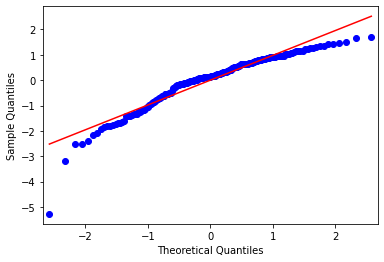

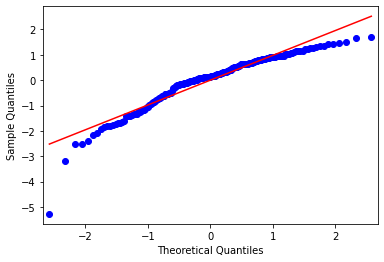

In [97]:
resid_sales = reg_model_sales_2.resid
sm.qqplot(resid_sales, line = 'r', fit = True)

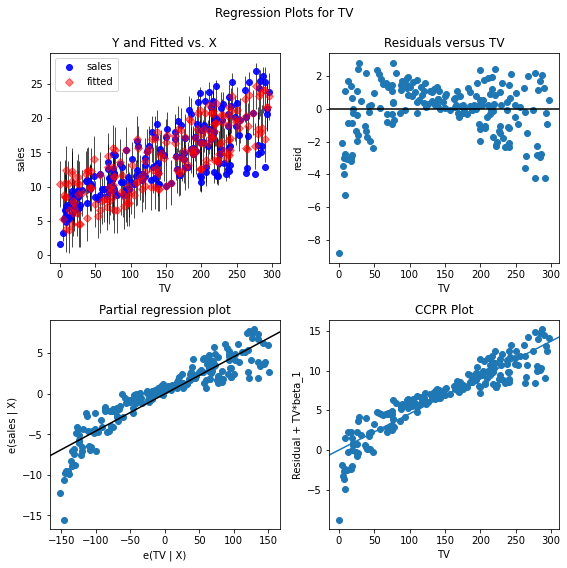

In [101]:
#Residual plots w.r.t 'TV'

# Define figure size
figure1 = plt.figure(figsize=(8,8))

# Produce regression plots for logreg_model
fig = sm.graphics.plot_regress_exog(reg_model_sales_1, 'TV', fig = figure1)

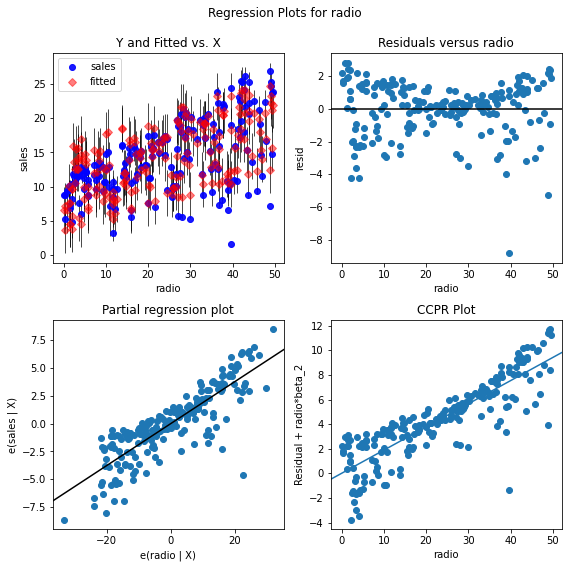

In [104]:
#Residual plots w.r.t 'radio'

# Define figure size
figure1 = plt.figure(figsize=(8,8))

# Produce regression plots for logreg_model
fig = sm.graphics.plot_regress_exog(reg_model_sales_1, 'radio', fig = figure1)

### The residual plot suggests that there is a pattern in the residuals w.r.t. TV but with radio, the plot is scattered
- Attempting to drop newspaper and retrain the model

In [107]:
#Dropping TV and building a new model with only radio

X3 = X.drop(columns = 'TV')
X3 = sm.add_constant(X3)

reg_model_sales_3 = sm.OLS(Y,X3).fit()

print(reg_model_sales_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           4.35e-19
Time:                        15:45:11   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

### We can see that the Rsquare has gone down, hence we would attempt Outlier diagnostics and drop the outliers

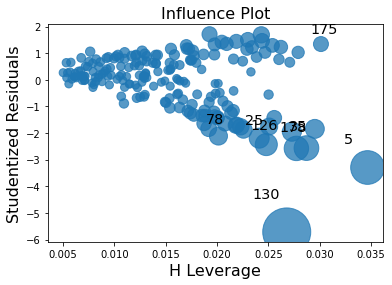

In [108]:
#Visualizing potential outliers

fig = sm.graphics.influence_plot(reg_model_sales_2)

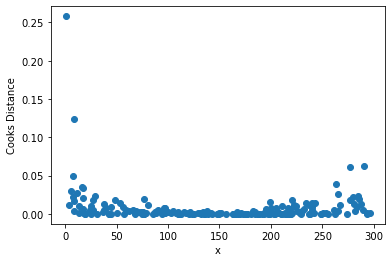

In [113]:
# Attempting to remove outliers via Cook's distance
# Observing w.r.t. the TV feature

influence = reg_model_sales_2.get_influence()

cooks_dist = influence.cooks_distance

plt.scatter(df_sales.TV, cooks_dist[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [130]:
#Creating a dataframe to identify the values with high cook's distance

df_sales_cooks = df_sales
df_sales_cooks['cooks_dist'] = cooks_dist[0]

In [132]:
df_sales_cooks.head()

,TV,radio,newspaper,sales,cooks_dist_tv,cooks_dist
0,230.1,37.8,69.2,22.1,0.004058,0.004058
1,44.5,39.3,45.1,10.4,0.008705,0.008705
2,17.2,45.9,69.3,9.3,0.034086,0.034086
3,151.5,41.3,58.5,18.5,0.001170,0.001170
4,180.8,10.8,58.4,12.9,0.000120,0.000120


In [133]:
#As per the visualization, we can consider any value over 0.1 as an outlier

bool_cooks = df_sales_cooks.cooks_dist > 0.1

df_sales_cooks_outliers = df_sales_cooks[bool_cooks]
df_sales_cooks_outliers.head()

,TV,radio,newspaper,sales,cooks_dist_tv,cooks_dist
5,8.7,48.9,75.0,7.2,0.123721,0.123721
130,0.7,39.6,8.7,1.6,0.258065,0.258065


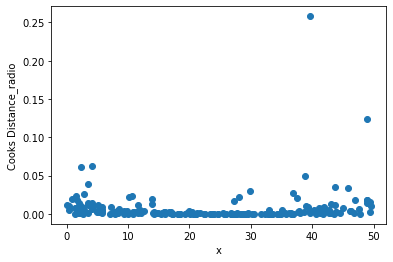

In [134]:
# Observing w.r.t. the radio feature

influence = reg_model_sales_2.get_influence()

cooks_dist = influence.cooks_distance

plt.scatter(df_sales.radio, cooks_dist[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance_radio')
plt.show()

In [166]:
#Here also we can consider values over 0.03 as outliers

bool_cooks = df_tv_cooks.cooks_dist > 0.03

df_tv_cooks_outliers = df_tv_cooks[bool_cooks]
df_tv_cooks_outliers

,TV,radio,newspaper,sales,cooks_dist_tv,cooks_dist
2,17.2,45.9,69.3,9.3,0.034086,0.034086
5,8.7,48.9,75.0,7.2,0.123721,0.123721
25,262.9,3.5,19.5,12.0,0.038847,0.038847
35,290.7,4.1,8.5,12.8,0.063065,0.063065
75,16.9,43.7,89.4,8.7,0.035028,0.035028
78,5.4,29.9,9.4,5.3,0.030101,0.030101
126,7.8,38.9,50.6,6.6,0.048958,0.048958
130,0.7,39.6,8.7,1.6,0.258065,0.258065
178,276.7,2.3,23.7,11.8,0.061401,0.061401


- Thus we can observe that the outliers are the same with respect to the TV and radio features
- Attempting to drop these outliers and retraining the model

In [167]:
df_sales_2 = df_sales.drop(labels=[2,5,25,35,75,78,126,130,178], axis=0)
df_sales_2.info()

#Thus we see that the total number of entries has reduced to 191

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             191 non-null    float64
 1   radio          191 non-null    float64
 2   newspaper      191 non-null    float64
 3   sales          191 non-null    float64
 4   cooks_dist_tv  191 non-null    float64
 5   cooks_dist     191 non-null    float64
dtypes: float64(6)
memory usage: 10.4 KB


In [168]:

df_sales_2[bool_cooks]

<ipython-input-168-c924d55690fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sales_2[bool_cooks]


,TV,radio,newspaper,sales,cooks_dist_tv,cooks_dist


- Thus we can see that the outliers have been dropped
- Attempting to retrain the model with the new data

In [169]:
X3 = df_sales_2.drop(columns = ['sales', 'newspaper'] )
Y = df_sales_2.sales

reg_model_sales_3 = sm.OLS(Y,X3).fit()

print(reg_model_sales_3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              4060.
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                   1.34e-170
Time:                        20:56:11   Log-Likelihood:                         -390.71
No. Observations:                 191   AIC:                                      787.4
Df Residuals:                     188   BIC:                                      797.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [170]:
series_vif_2 = pd.Series([variance_inflation_factor(X3.values,i)
                        for i in range(X3.shape[1])],
                        index = X3.columns)

series_vif_2

C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


TV               2.760263
radio            2.588237
cooks_dist_tv         inf
cooks_dist            inf
dtype: float64

In [171]:
X3.drop(columns = ['cooks_dist', 'cooks_dist_tv'], inplace = True)
X3

,TV,radio
0,230.1,37.8
1,44.5,39.3
3,151.5,41.3
4,180.8,10.8
6,57.5,32.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


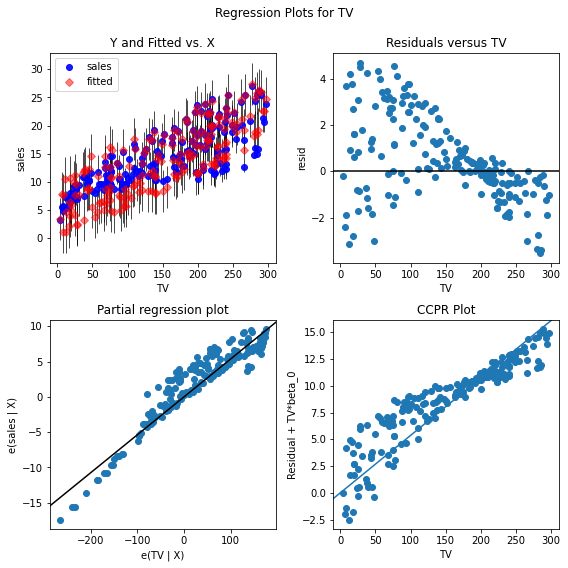

In [177]:
#Checking the residuals for both the features

resid_3 = reg_model_sales_3.resid
figure2 = plt.figure(figsize = (8,8))

fig = sm.graphics.plot_regress_exog(reg_model_sales_3, 'TV', fig = figure2)

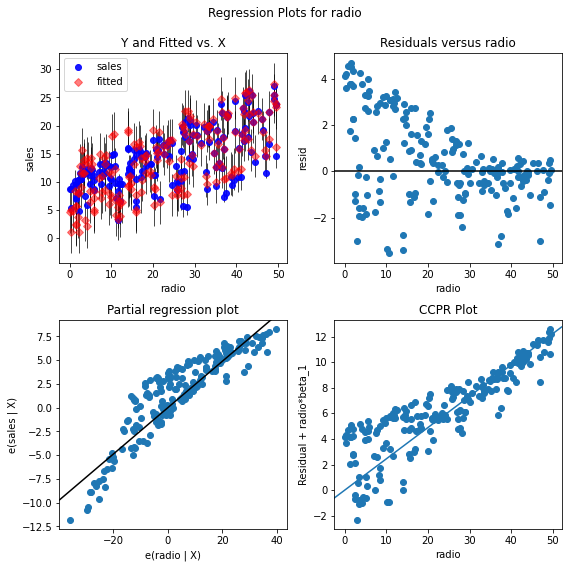

In [173]:
#Checking the residuals for both the features

resid_2 = reg_model_sales_2.resid
figure2 = plt.figure(figsize = (8,8))

fig = sm.graphics.plot_regress_exog(reg_model_sales_3, 'radio', fig = figure2)

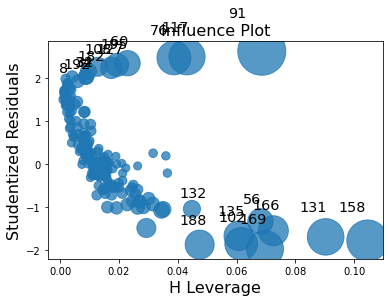

In [174]:
#Checking the influence of outliers again

fig = sm.graphics.influence_plot(reg_model_sales_3)

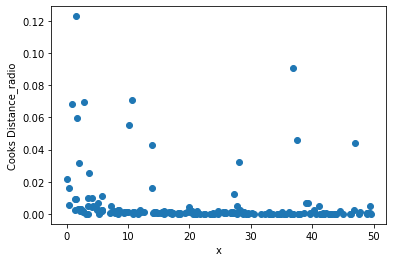

In [175]:
df_sales_3 = X3

influence = reg_model_sales_3.get_influence()

cooks_dist_3 = influence.cooks_distance

plt.scatter(df_sales_3.radio, cooks_dist_3[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance_radio')
plt.show()

### - Closing the solution after two iterations. Going ahead with R2 .984 for model 3. 
The equation is 
- Sales = .0537 * TV spend + .2447 * radio spend